<a href="https://colab.research.google.com/github/jeddyclass/202211.NCUT/blob/main/PCA-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# coding：utf-8
# reference: 夜空中最亮的星_6c64
# link：https://www.jianshu.com/p/58b276f7e7fd

from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn import manifold, datasets, decomposition, ensemble, random_projection

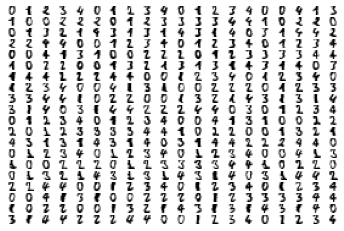

In [2]:
# 加载sklearn.datasets MNIST：包含 5 classes digit
digits = datasets.load_digits(n_class=5)
x = digits.data
y = digits.target
# X.shape, y.shape ((901, 64), (901,)) h x w = 8 x 8
images = x.reshape((-1,8,8))
# print(x.shape)

def show_images(images, n): 
    # images: show images
    # n: 展示的图片个数nxn
    plt.figure()
    for i, image in enumerate(images[0 : n * n]):
        ax = plt.subplot(n, n, i+1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.binary)
    plt.show()

show_images(images, 20)

In [4]:
#2D/3D visualization
n_neighbors = 30

# 二维数据可视化函数
def plot_embedding_2d(X,title=None):
    #坐标缩放到[0，1)区间
    x_min,x_max = np.min(X,axis=0),np.max(X,axis=0)
    X = (X - x_min)/(x_max - x_min)
    #降维后坐标为（X[i，0]，X[i，1]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for i in range(X.shape[0]):
        ax.text(X[i, 0],X[i, 1],str(digits.target[i]),
                color = plt.cm.Set1(y[i]/10.),
                fontdict={'weight':'bold','size':9})
    if title is not None:
        plt.title(title)

# 三维数据可视化函数
def plot_embedding_3d(X,title=None):
    # 坐标缩放到[0，1)区间
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    # 降维后坐标为（X[i，0]，X[i，1]，X[i，2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1,projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],X[i, 2], str(digits.target[i]),
                color=plt.cm.Set1(y[i] / 10.),
                fontdict={'weight': 'bold', 'size': 9})
    if title is not None:
        plt.title(title)

Computing random projection


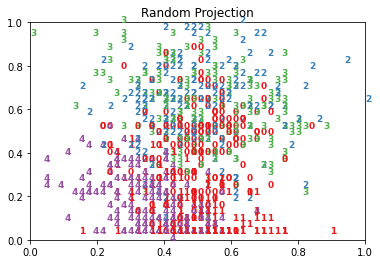

In [5]:
#Random project
n_components = 2
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42) # 《银河系漫游指南》中42是超级计算机得出的生命终极答案 :-)
x_projected = rp.fit_transform(x)
plot_embedding_2d(x_projected, "Random Projection")

Computing PCA projection


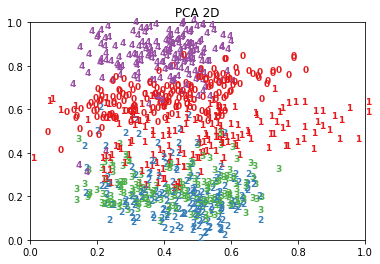

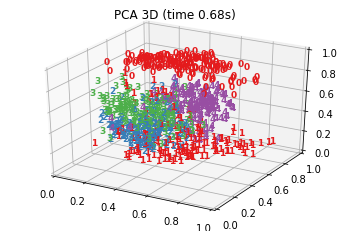

In [6]:
#PCA 64->2D/3D
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(x)
plot_embedding_2d(X_pca[:,0:2],"PCA 2D")
plot_embedding_3d(X_pca,"PCA 3D (time %.2fs)" % (time() -t0))

Computing LDA projection


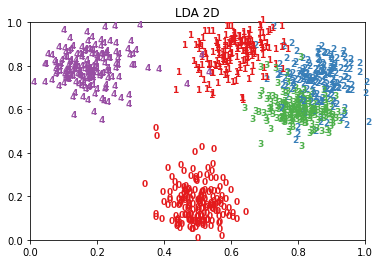

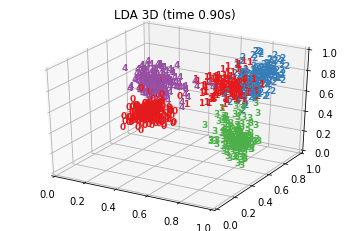

In [7]:
#线形判别分析（Linear Discriminant Analysis，LDA）从64维降到2，3维
print("Computing LDA projection")
X2 = x.copy()
X2.flat[::x.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = lda(n_components=3).fit_transform(X2,y)
plot_embedding_2d(X_lda[:,0:2],"LDA 2D" )
plot_embedding_3d(X_lda,"LDA 3D (time %.2fs)" %(time() - t0))

Computing Isomap embedding


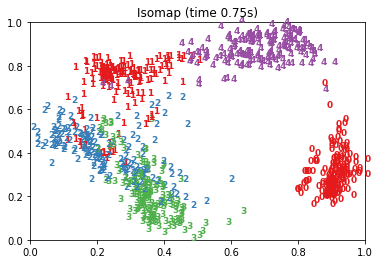

In [8]:
#Isomap 64D->2D
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=30,n_components=2).fit_transform(x)
# From version 0.25 passing n_neighbors as positional arguments will result in an error FutureWarning
# X_iso = manifold.Isomap(n_components=2).fit_transform(x)
plot_embedding_2d(X_iso,"Isomap (time %.2fs)" %(time() - t0))

Computing LLE embedding
Done. Reconstruction error: 1.03492e-06
Computing modified LLE embedding
Done. Reconstruction error: 0.283044
Computing Hessian LLE embedding
Done. Reconstruction error: 0.157918


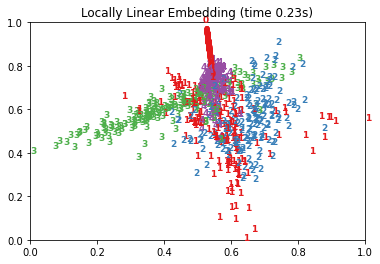

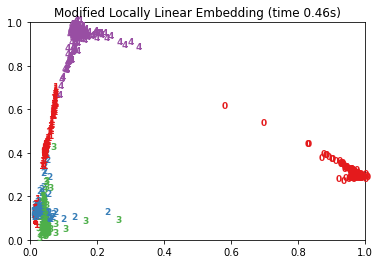

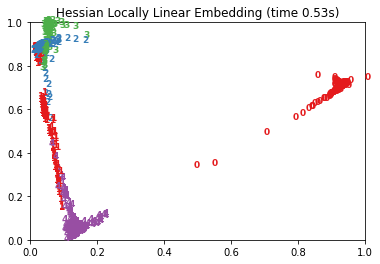

In [10]:
#LLE 64D->2D
#标准版 局部线性嵌入(Locally-linear embedding，LLE)从64维降到2维
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=2,method='standard')
t0 = time()
X_lle = clf.fit_transform(x)
#Done. Reconstruction error: 1.11351e-06
print("Done. Reconstruction error: %g" %clf.reconstruction_error_)
plot_embedding_2d(X_lle,"Locally Linear Embedding (time %.2fs)" %(time() - t0))

#改进版 局部线性嵌入(Locally-linear embedding，LLE)从64维降到2维
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=2,method='modified')
t0 = time()
X_mlle = clf.fit_transform(x)
#Done. Reconstruction error: 0.282968
print("Done. Reconstruction error: %g" %clf.reconstruction_error_)
plot_embedding_2d(X_mlle,"Modified Locally Linear Embedding (time %.2fs)" %(time() - t0))

#hessian 局部线性嵌入(Locally-linear embedding，LLE)从64维降到2维
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=2,method='hessian')
t0 = time()
X_hlle = clf.fit_transform(x)
#Done. Reconstruction error: 0.158393
print("Done. Reconstruction error: %g" %clf.reconstruction_error_)
plot_embedding_2d(X_hlle,"Hessian Locally Linear Embedding (time %.2fs)" %(time() - t0))

Computing LTSA  embedding
Done. Reconstruction error: 0.157966


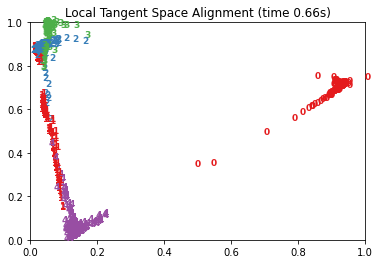

In [11]:
#LTSA 64D->2D
#部分切空间排列算法（LTSA ，Local tangent space alignment) 从64维降到2维
print("Computing LTSA  embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=2,method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(x)
print("Done. Reconstruction error: %g" %clf.reconstruction_error_)
plot_embedding_2d(X_ltsa,"Local Tangent Space Alignment (time %.2fs)" %(time() - t0))

Computing MDS embedding
Done. Stress: 103232314.114856


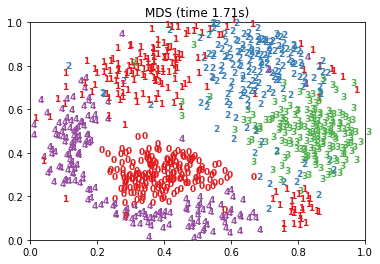

In [12]:
#MDS 64D->2D
#多维标度分析（MDS，Multidimensional Scaling）从64维降到2维
print("Computing MDS embedding")
clf= manifold.MDS(n_components=2,n_init=1,max_iter=100)
t0 = time()
X_mds = clf.fit_transform(x)
print("Done. Stress: %f" %clf.stress_)
plot_embedding_2d(X_mds,"MDS (time %.2fs)" %(time()-t0))

Computing Totally Random Trees embedding


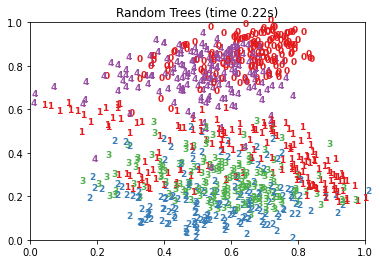

In [13]:
#Random Tree 64D->2D
#随机森林从64维降到2维
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200,random_state=0,max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(x)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)
plot_embedding_2d(X_reduced,"Random Trees (time %.2fs)" %(time()-t0))

Computing Spectral embedding


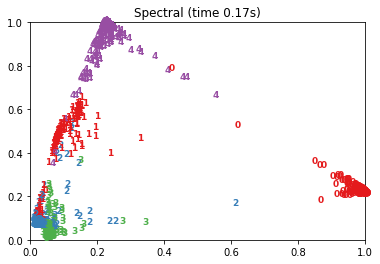

In [14]:
#Spectral
#谱嵌入 从64维降到2维
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2,random_state=0,eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(x)
plot_embedding_2d(X_se,"Spectral (time %.2fs)" %(time()-t0))

Computing t-SNE embedding


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


(901, 3)


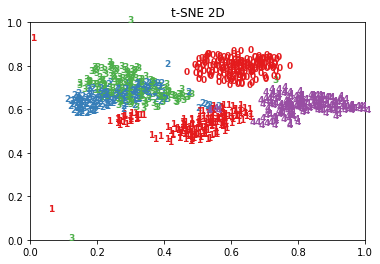

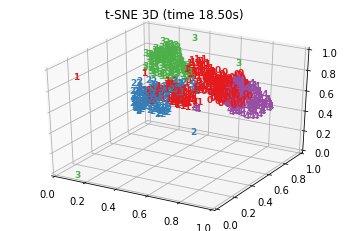

In [15]:
#t-SIN
#t-分布邻域嵌入算法(t-SNE t-distributed stochastic neighbor embedding algorithm) 从64维降到2,3维
#init设置embedding的初始化方式，可选random或者pca，这里用pca，比起random,init会更stable一些。
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=3,init='pca',random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(x)
#降维后得到X_ tsne，大小是(901,3)
print(X_tsne.shape)
plot_embedding_2d(X_tsne[:,0:2],"t-SNE 2D")
plot_embedding_3d(X_tsne,"t-SNE 3D (time %.2fs)" %(time()-t0))
plt.show()